#Dog Breed Identifier

## Import data from kaggle

In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c dog-breed-identification

100% 689M/691M [00:31<00:00, 23.6MB/s]
100% 691M/691M [00:31<00:00, 22.7MB/s]


In [3]:
!unzip dog-breed-identification.zip


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.

In [4]:
import pandas as pd
import numpy as np

In [5]:
df_label = pd.read_csv('labels.csv')
df_label

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [6]:
import tensorflow as tf
import tensorflow_hub as hub

### Working on dataset and exploring it

In [7]:

df_label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
df_label.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


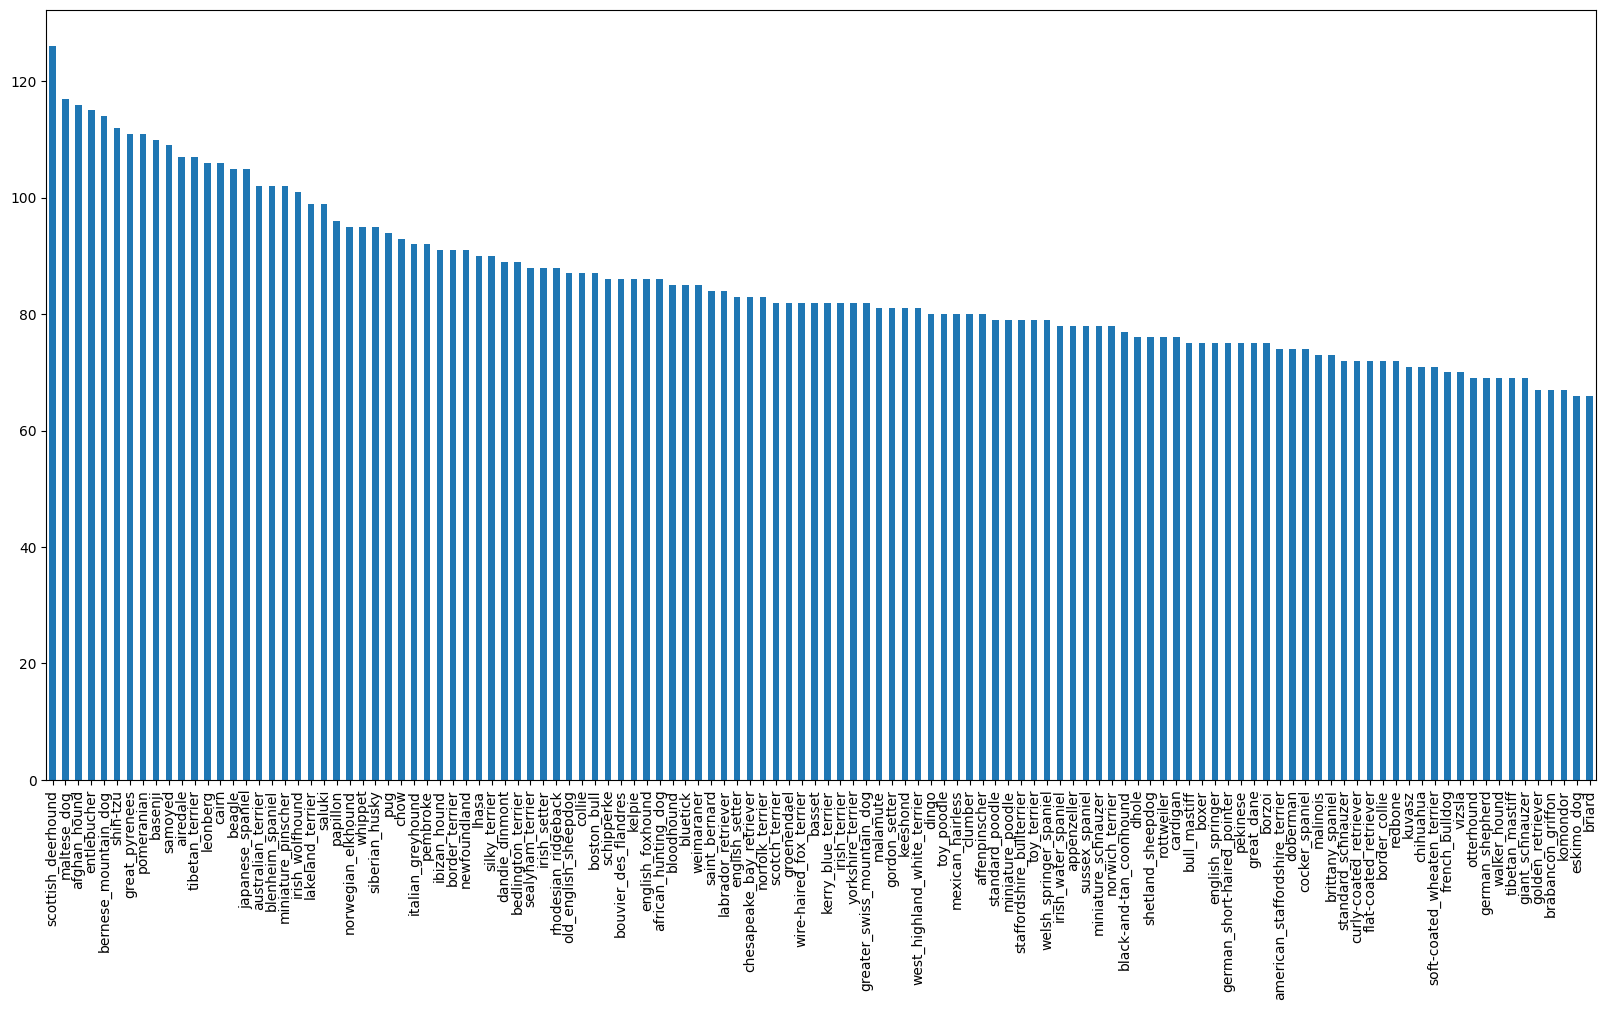

In [9]:
df_label['breed'].value_counts().plot.bar(figsize=(20, 10));

In [10]:
# Create pathnames from image ID's
filenames = ["train/" + fname + ".jpg" for fname in df_label["id"]]

# Check the first 10 filenames
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [11]:
from IPython.display import display, Image


In [12]:
'train/'+df_label.id[5000]

'train/7e5300a4c551a23c3e27b4ca3b77fd62'

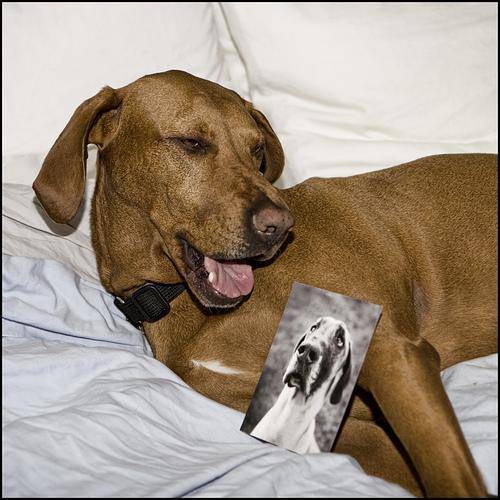

In [13]:
Image('train/'+df_label.id[100]+'.jpg')

In [14]:
labels = df_label["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [15]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [16]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:4]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
X = filenames
y = boolean_labels

In [18]:
NUM_IMAGES=len(filenames)
NUM_IMAGES

10222

In [19]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [20]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [21]:
process_image(filenames[0])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5705322 , 0.33588538, 0.15008473],
        [0.66901225, 0.4601166 , 0.26022965],
        [0.61062384, 0.43763596, 0.21601713],
        ...,
        [0.8182312 , 0.7297958 , 0.26963907],
        [0.72454786, 0.6059109 , 0.2653059 ],
        [0.7494603 , 0.6252918 , 0.32456532]],

       [[0.6761415 , 0.4733761 , 0.30642927],
        [0.5672121 , 0.38192675, 0.20349538],
        [0.5883547 , 0.4322571 , 0.2403155 ],
        ...,
        [0.9326942 , 0.8260503 , 0.41093278],
        [0.86072475, 0.74250627, 0.3694122 ],
        [0.76781666, 0.6461604 , 0.29291284]],

       [[0.46350825, 0.29595745, 0.1536156 ],
        [0.42554107, 0.27039403, 0.12009468],
        [0.7887875 , 0.6547362 , 0.49015   ],
        ...,
        [0.89372385, 0.7696401 , 0.41811958],
        [0.88609535, 0.7585918 , 0.36495727],
        [0.8243601 , 0.69494826, 0.2930575 ]],

       ...,

       [[0.7344025 , 0.4716574 , 0.2559711 ],
        [0.71

In [22]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)

  return image, label

In [23]:
# Define the batch size, 32 is a good default,lets try 64 aswell
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [24]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [25]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Train simple models

In [26]:
from tensorflow.keras import layers, models


In [27]:
NUM_CLASSES = 120

In [28]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')  # NUM_CLASSES is the number of dog breeds you're classifying
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' since we are using one-hot to encode the labels
              metrics=['accuracy'])

In [29]:
num_epochs = 10  # You can adjust this based on the model's performance on validation data

history = model.fit(train_data,
                    epochs=num_epochs,
                    validation_data=val_data)


Epoch 1/10
256/256 [==============================] - 35s 80ms/step - loss: 4.7996 - accuracy: 0.0095 - val_loss: 4.7817 - val_accuracy: 0.0186
Epoch 2/10
256/256 [==============================] - 19s 72ms/step - loss: 4.7089 - accuracy: 0.0205 - val_loss: 4.6580 - val_accuracy: 0.0166
Epoch 3/10
256/256 [==============================] - 19s 73ms/step - loss: 4.2450 - accuracy: 0.0827 - val_loss: 4.6741 - val_accuracy: 0.0367
Epoch 4/10
256/256 [==============================] - 25s 98ms/step - loss: 2.6389 - accuracy: 0.3839 - val_loss: 6.0849 - val_accuracy: 0.0391
Epoch 5/10
256/256 [==============================] - 20s 78ms/step - loss: 0.8519 - accuracy: 0.7919 - val_loss: 11.1731 - val_accuracy: 0.0352
Epoch 6/10
256/256 [==============================] - 25s 99ms/step - loss: 0.2909 - accuracy: 0.9354 - val_loss: 15.1113 - val_accuracy: 0.0362
Epoch 7/10
256/256 [==============================] - 20s 78ms/step - loss: 0.1737 - accuracy: 0.9648 - val_loss: 18.9615 - val_accura

#### Trying new things to improve the results

In [30]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

augmented_train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))


In [31]:
num_epochs = 10  # You can adjust this based on the model's performance on validation data

history_aug_data = model.fit(augmented_train_data,
                    epochs=num_epochs,
                    validation_data=val_data)


Epoch 1/10
256/256 [==============================] - 105s 411ms/step - loss: 5.0412 - accuracy: 0.0088 - val_loss: 4.7859 - val_accuracy: 0.0103
Epoch 2/10
256/256 [==============================] - 106s 414ms/step - loss: 4.7818 - accuracy: 0.0104 - val_loss: 4.7841 - val_accuracy: 0.0103
Epoch 3/10
256/256 [==============================] - 103s 401ms/step - loss: 4.7795 - accuracy: 0.0100 - val_loss: 4.7837 - val_accuracy: 0.0098
Epoch 4/10
256/256 [==============================] - 107s 417ms/step - loss: 4.7784 - accuracy: 0.0113 - val_loss: 4.7838 - val_accuracy: 0.0098
Epoch 5/10
256/256 [==============================] - 107s 420ms/step - loss: 4.7780 - accuracy: 0.0111 - val_loss: 4.7841 - val_accuracy: 0.0098
Epoch 6/10
256/256 [==============================] - 105s 412ms/step - loss: 4.7778 - accuracy: 0.0119 - val_loss: 4.7843 - val_accuracy: 0.0098
Epoch 7/10
256/256 [==============================] - 105s 411ms/step - loss: 4.7776 - accuracy: 0.0111 - val_loss: 4.7843 -

In [32]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(l=0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(l=0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')  # NUM_CLASSES is the number of dog breeds you're classifying
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' since we are using one-hot to encode the labels
              metrics=['accuracy'])


In [33]:
num_epochs = 30  # You can adjust this based on the model's performance on validation data

history_l2_data = model.fit(train_data,
                    epochs=num_epochs,
                    validation_data=val_data)

Epoch 1/30
256/256 [==============================] - 19s 68ms/step - loss: 4.9993 - accuracy: 0.0082 - val_loss: 4.8150 - val_accuracy: 0.0093
Epoch 2/30
256/256 [==============================] - 20s 79ms/step - loss: 4.7956 - accuracy: 0.0108 - val_loss: 4.7883 - val_accuracy: 0.0093
Epoch 3/30
256/256 [==============================] - 20s 78ms/step - loss: 4.7828 - accuracy: 0.0108 - val_loss: 4.7846 - val_accuracy: 0.0098
Epoch 4/30
256/256 [==============================] - 19s 72ms/step - loss: 4.7797 - accuracy: 0.0111 - val_loss: 4.7839 - val_accuracy: 0.0098
Epoch 5/30
256/256 [==============================] - 21s 83ms/step - loss: 4.7785 - accuracy: 0.0110 - val_loss: 4.7841 - val_accuracy: 0.0098
Epoch 6/30
256/256 [==============================] - 19s 75ms/step - loss: 4.7781 - accuracy: 0.0119 - val_loss: 4.7843 - val_accuracy: 0.0098
Epoch 7/30
256/256 [==============================] - 18s 69ms/step - loss: 4.7777 - accuracy: 0.0119 - val_loss: 4.7848 - val_accuracy:

#### Trying pretrained model

In [56]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [57]:
INPUT_SHAPE

[None, 224, 224, 3]

In [58]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL,opt=tf.keras.optimizers.Adam()):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=opt, # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

In [59]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_9 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [60]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [61]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [62]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [63]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "Available" if tf.config.list_physical_devices("GPU") else "not available")

GPU Available


In [64]:
# Build a function to train and return a trained model
def train_model(create_model=create_model,opt=tf.keras.optimizers.Adam()):
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model(opt=opt)

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  history = model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model,history

In [65]:
import os

NUM_EPOCHS = 100

model, history = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
256/256 [==============================] - 27s 76ms/step - loss: 1.4605 - accuracy: 0.6493 - val_loss: 0.7329 - val_accuracy: 0.7888
Epoch 2/100
256/256 [==============================] - 29s 114ms/step - loss: 0.4095 - accuracy: 0.8825 - val_loss: 0.6729 - val_accuracy: 0.8015
Epoch 3/100
256/256 [==============================] - 30s 115ms/step - loss: 0.2354 - accuracy: 0.9392 - val_loss: 0.6493 - val_accuracy: 0.8108
Epoch 4/100
256/256 [==============================] - 26s 100ms/step - loss: 0.1494 - accuracy: 0.9693 - val_loss: 0.6605 - val_accuracy: 0.8010
Epoch 5/100
256/256 [==============================] - 21s 83ms/step - loss: 0.1011 - accuracy: 0.9831 - val_loss: 0.6630 - val_accuracy: 0.8029
Epoch 6/100
256/256 [==============================] - 18s 71ms/step - loss: 0.0723 - accuracy: 0.9898 - val_loss: 0.6733 - val_accuracy: 0.8137
Epoch 7/100
256/256 [=============

In [67]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

64/64 [==============================] - 5s 76ms/step


array([[2.46439136e-09, 8.19512624e-10, 4.67897756e-08, ...,
        6.36728856e-08, 9.33482988e-06, 9.47513854e-07],
       [3.50339957e-09, 7.10216625e-07, 1.00884110e-08, ...,
        3.60709080e-08, 1.16540622e-09, 1.30305841e-06],
       [4.31301487e-07, 4.10150424e-05, 3.76095841e-06, ...,
        1.24948900e-04, 6.71746893e-05, 1.65173685e-06],
       ...,
       [9.52604484e-09, 7.13348436e-06, 1.68795129e-08, ...,
        4.75118833e-09, 8.68101836e-07, 3.36656149e-06],
       [5.98198768e-10, 1.41417075e-07, 1.09710008e-09, ...,
        9.33093158e-10, 7.10531154e-08, 1.32664568e-09],
       [1.65659310e-06, 1.57296043e-08, 3.83042419e-07, ...,
        1.12185276e-07, 5.26608765e-08, 2.31203803e-08]], dtype=float32)

In [68]:
# Check the shape of predictions
predictions.shape

(2045, 120)

In [69]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[2.46439136e-09 8.19512624e-10 4.67897756e-08 3.36210770e-09
 4.55745344e-08 2.99055318e-06 1.29816002e-07 4.50248946e-04
 3.85124155e-10 5.39207932e-08 1.70760728e-07 4.76978346e-10
 1.27163128e-06 2.52431986e-09 4.95938535e-09 1.26078135e-06
 1.11931504e-08 3.92164834e-09 4.17449320e-09 4.14197393e-06
 2.08325623e-09 2.29887859e-10 1.66614669e-08 2.32251038e-10
 9.06689301e-09 2.32392411e-10 1.78849419e-07 9.33839495e-09
 3.16451448e-10 4.60389165e-05 2.12421103e-09 1.95952565e-09
 8.80724327e-10 1.34780258e-08 8.14760648e-10 3.17899906e-09
 4.22444968e-09 5.43354055e-08 1.52832035e-05 1.89574223e-08
 1.14221912e-08 3.91508648e-09 2.27491810e-07 5.42874716e-07
 3.90803390e-10 3.50191840e-07 6.42709386e-10 9.83104353e-09
 1.94056438e-09 8.79616324e-10 6.05483619e-09 6.60119126e-10
 9.62210134e-09 1.63789160e-09 1.26685051e-09 5.25930375e-07
 2.21317284e-10 1.00581543e-08 3.99209110e-09 9.32678379e-10
 1.08157938e-05 7.35504386e-08 1.76817483e-09 1.74396264e-05
 9.41070937e-08 7.823417

### Fine-Tuning MobileNet

In [70]:
import tensorflow as tf
import tensorflow_hub as hub

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
INPUT_SHAPE = (224, 224, 3)  # Standard input shape for MobileNetV2
OUTPUT_SHAPE = NUM_CLASSES  # Replace NUM_CLASSES with the number of classes in your specific problem

def create_finetuned_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL,opt=tf.keras.optimizers.Adam()):
    print("Building model with:", MODEL_URL)

    # Load the pre-trained MobileNetV2 model from TensorFlow Hub
    base_model = hub.KerasLayer(MODEL_URL, trainable=False, input_shape=input_shape)

    # Create a new sequential model for fine-tuning
    model = tf.keras.Sequential([
        base_model,  # Layer 1: Pre-trained MobileNetV2
        tf.keras.layers.Dense(output_shape, activation="softmax")  # Layer 2: Output layer
    ])

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=opt,
        metrics=["accuracy"]
    )

    return model


In [71]:
model_finetuned_adam,history_finetuned_adam = train_model(create_finetuned_model,opt=tf.keras.optimizers.Adam())

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
256/256 [==============================] - 27s 84ms/step - loss: 1.5127 - accuracy: 0.6331 - val_loss: 0.6975 - val_accuracy: 0.7907
Epoch 2/100
256/256 [==============================] - 20s 78ms/step - loss: 0.4151 - accuracy: 0.8821 - val_loss: 0.6322 - val_accuracy: 0.8098
Epoch 3/100
256/256 [==============================] - 20s 78ms/step - loss: 0.2369 - accuracy: 0.9374 - val_loss: 0.6285 - val_accuracy: 0.8171
Epoch 4/100
256/256 [==============================] - 20s 79ms/step - loss: 0.1512 - accuracy: 0.9670 - val_loss: 0.6374 - val_accuracy: 0.8098
Epoch 5/100
256/256 [==============================] - 20s 78ms/step - loss: 0.1004 - accuracy: 0.9835 - val_loss: 0.6438 - val_accuracy: 0.8103
Epoch 6/100
256/256 [==============================] - 26s 103ms/step - loss: 0.0731 - accuracy: 0.9891 - val_loss: 0.6544 - val_accuracy: 0.8137


In [72]:
model_finetuned_rmsp, history_finetuned_rmsp = train_model(create_finetuned_model,opt=tf.keras.optimizers.RMSprop())

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
256/256 [==============================] - 27s 90ms/step - loss: 1.5186 - accuracy: 0.6383 - val_loss: 0.7137 - val_accuracy: 0.7917
Epoch 2/100
256/256 [==============================] - 20s 78ms/step - loss: 0.4796 - accuracy: 0.8643 - val_loss: 0.6706 - val_accuracy: 0.8127
Epoch 3/100
256/256 [==============================] - 18s 72ms/step - loss: 0.3025 - accuracy: 0.9159 - val_loss: 0.6437 - val_accuracy: 0.8142
Epoch 4/100
256/256 [==============================] - 20s 78ms/step - loss: 0.2060 - accuracy: 0.9485 - val_loss: 0.6632 - val_accuracy: 0.8088
Epoch 5/100
256/256 [==============================] - 20s 78ms/step - loss: 0.1446 - accuracy: 0.9667 - val_loss: 0.6650 - val_accuracy: 0.8152
Epoch 6/100
256/256 [==============================] - 24s 93ms/step - loss: 0.1054 - accuracy: 0.9768 - val_loss: 0.6885 - val_accuracy: 0.8068
Epoch 7/100
256/256 [================

In [73]:
model_finetuned_sgd, history_finetuned_sgd = train_model(create_finetuned_model,opt=tf.keras.optimizers.SGD())

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
256/256 [==============================] - 22s 73ms/step - loss: 2.8792 - accuracy: 0.3724 - val_loss: 1.4206 - val_accuracy: 0.6543
Epoch 2/100
256/256 [==============================] - 20s 78ms/step - loss: 1.0454 - accuracy: 0.7433 - val_loss: 0.9140 - val_accuracy: 0.7550
Epoch 3/100
256/256 [==============================] - 18s 71ms/step - loss: 0.7262 - accuracy: 0.8097 - val_loss: 0.7673 - val_accuracy: 0.7858
Epoch 4/100
256/256 [==============================] - 24s 93ms/step - loss: 0.5895 - accuracy: 0.8459 - val_loss: 0.7014 - val_accuracy: 0.7961
Epoch 5/100
256/256 [==============================] - 20s 76ms/step - loss: 0.5083 - accuracy: 0.8650 - val_loss: 0.6573 - val_accuracy: 0.8132
Epoch 6/100
256/256 [==============================] - 18s 70ms/step - loss: 0.4514 - accuracy: 0.8844 - val_loss: 0.6317 - val_accuracy: 0.8112
Epoch 7/100
256/256 [================

In [74]:
def create_finetuned_model_dropout(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL,opt=tf.keras.optimizers.Adam(),dropout_rate=0.5):
    print("Building model with:", MODEL_URL)

    # Load the pre-trained MobileNetV2 model from TensorFlow Hub
    base_model = hub.KerasLayer(MODEL_URL, trainable=False, input_shape=input_shape)

    # Create a new sequential model for fine-tuning
    model = tf.keras.Sequential([
        base_model,  # Layer 1: Pre-trained MobileNetV2
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(output_shape, activation="softmax")  # Layer 2: Output layer
    ])

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=opt,
        metrics=["accuracy"]
    )

    return model


In [75]:
model_finetuned_sgd_dropout, history_finetuned_sgd_dropout = train_model(create_finetuned_model_dropout,opt=tf.keras.optimizers.SGD(clipnorm=1.0))

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
256/256 [==============================] - 27s 73ms/step - loss: 6.1134 - accuracy: 0.0165 - val_loss: 4.5680 - val_accuracy: 0.0660
Epoch 2/100
256/256 [==============================] - 20s 78ms/step - loss: 5.0609 - accuracy: 0.0556 - val_loss: 3.6924 - val_accuracy: 0.1648
Epoch 3/100
256/256 [==============================] - 20s 78ms/step - loss: 4.2398 - accuracy: 0.1217 - val_loss: 2.9895 - val_accuracy: 0.3291
Epoch 4/100
256/256 [==============================] - 20s 78ms/step - loss: 3.5950 - accuracy: 0.1975 - val_loss: 2.4578 - val_accuracy: 0.4553
Epoch 5/100
256/256 [==============================] - 20s 78ms/step - loss: 3.0681 - accuracy: 0.2750 - val_loss: 2.0605 - val_accuracy: 0.5457
Epoch 6/100
256/256 [==============================] - 19s 75ms/step - loss: 2.6422 - accuracy: 0.3512 - val_loss: 1.7619 - val_accuracy: 0.5995
Epoch 7/100
256/256 [================

In [76]:
model_finetuned_adam_dropout, history_finetuned_adam_dropout = train_model(create_finetuned_model_dropout,opt=tf.keras.optimizers.Adam(clipnorm=1.0))

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
256/256 [==============================] - 22s 71ms/step - loss: 2.3280 - accuracy: 0.4694 - val_loss: 0.7623 - val_accuracy: 0.7848
Epoch 2/100
256/256 [==============================] - 18s 70ms/step - loss: 0.7893 - accuracy: 0.7705 - val_loss: 0.6681 - val_accuracy: 0.8073
Epoch 3/100
256/256 [==============================] - 20s 77ms/step - loss: 0.5485 - accuracy: 0.8300 - val_loss: 0.6328 - val_accuracy: 0.8122
Epoch 4/100
256/256 [==============================] - 23s 90ms/step - loss: 0.4291 - accuracy: 0.8610 - val_loss: 0.6632 - val_accuracy: 0.8122
Epoch 5/100
256/256 [==============================] - 18s 70ms/step - loss: 0.3343 - accuracy: 0.8880 - val_loss: 0.6851 - val_accuracy: 0.8054
Epoch 6/100
256/256 [==============================] - 19s 73ms/step - loss: 0.2997 - accuracy: 0.8995 - val_loss: 0.7148 - val_accuracy: 0.8078


In [77]:
model_finetuned_rmsp_dropout, history_finetuned_rmsp_dropout  = train_model(create_finetuned_model_dropout,opt=tf.keras.optimizers.Adam(clipnorm=1.0))

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
256/256 [==============================] - 23s 75ms/step - loss: 2.3669 - accuracy: 0.4637 - val_loss: 0.7324 - val_accuracy: 0.7848
Epoch 2/100
256/256 [==============================] - 18s 70ms/step - loss: 0.8013 - accuracy: 0.7702 - val_loss: 0.6580 - val_accuracy: 0.8059
Epoch 3/100
256/256 [==============================] - 21s 84ms/step - loss: 0.5547 - accuracy: 0.8285 - val_loss: 0.6536 - val_accuracy: 0.8054
Epoch 4/100
256/256 [==============================] - 21s 81ms/step - loss: 0.4359 - accuracy: 0.8633 - val_loss: 0.6661 - val_accuracy: 0.8088
Epoch 5/100
256/256 [==============================] - 19s 74ms/step - loss: 0.3609 - accuracy: 0.8836 - val_loss: 0.6824 - val_accuracy: 0.8103
Epoch 6/100
256/256 [==============================] - 20s 78ms/step - loss: 0.3164 - accuracy: 0.8953 - val_loss: 0.7141 - val_accuracy: 0.8083
Epoch 7/100
256/256 [================

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have your test data in test_data (features) and test_labels (one-hot encoded labels)
test_predictions = model_finetuned_adam.predict(val_data)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(y_val, axis=1)

# Calculate and print confusion matrix
confusion_mat = confusion_matrix(test_true_classes, test_predictions_classes)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate and print classification report (includes precision, recall, F1-score, and support)
classification_rep = classification_report(test_true_classes, test_predictions_classes)
print("Classification Report:")
print(classification_rep)

# Calculate and print accuracy (same as accuracy in classification report)
accuracy = np.sum(test_predictions_classes == test_true_classes) / len(test_true_classes)
print("Accuracy:", accuracy)

64/64 [==============================] - 4s 58ms/step
Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 1 20  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 11  0]
 [ 0  0  0 ...  0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.95      0.91      0.93        22
           2       1.00      0.88      0.94        26
           3       1.00      0.81      0.90        27
           4       0.46      0.50      0.48        12
           5       0.82      0.47      0.60        19
           6       0.81      0.81      0.81        26
           7       0.79      0.95      0.86        20
           8       0.86      0.80      0.83        15
           9       0.68      0.68      0.68        19
          10       1.00      0.90      0.95        29
          11       0.93      0.96      0.94        26
          12       1.00      0.93      0.96   

In [79]:
# Calculate and print other metrics as needed (e.g., recall, precision, F1-score)
# For recall, precision, F1-score: labels parameter specifies which classes to include in the average calculation.
# 'macro' calculates metrics for each label and finds their unweighted mean (useful for multi-class problems)
# 'weighted' calculates metrics for each label and finds their average, weighted by support (useful for imbalanced datasets)
from sklearn.metrics import recall_score,precision_score,f1_score

recall = recall_score(test_true_classes, test_predictions_classes, labels=None, average='macro')
precision = precision_score(test_true_classes, test_predictions_classes, labels=None, average='macro')
f1 = f1_score(test_true_classes, test_predictions_classes, labels=None, average='macro')

print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1)

Recall: 0.8053487124776482
Precision: 0.8094020382209208
F1-score: 0.8015402914409226


In [80]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object after training your model
# history = model_finetuned_adam.fit(train_data, epochs=num_epochs, validation_data=val_data)
def accuracy_validation_plot(history, title):

  # Plot training & validation accuracy values
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title(title + ' Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(title+' Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()


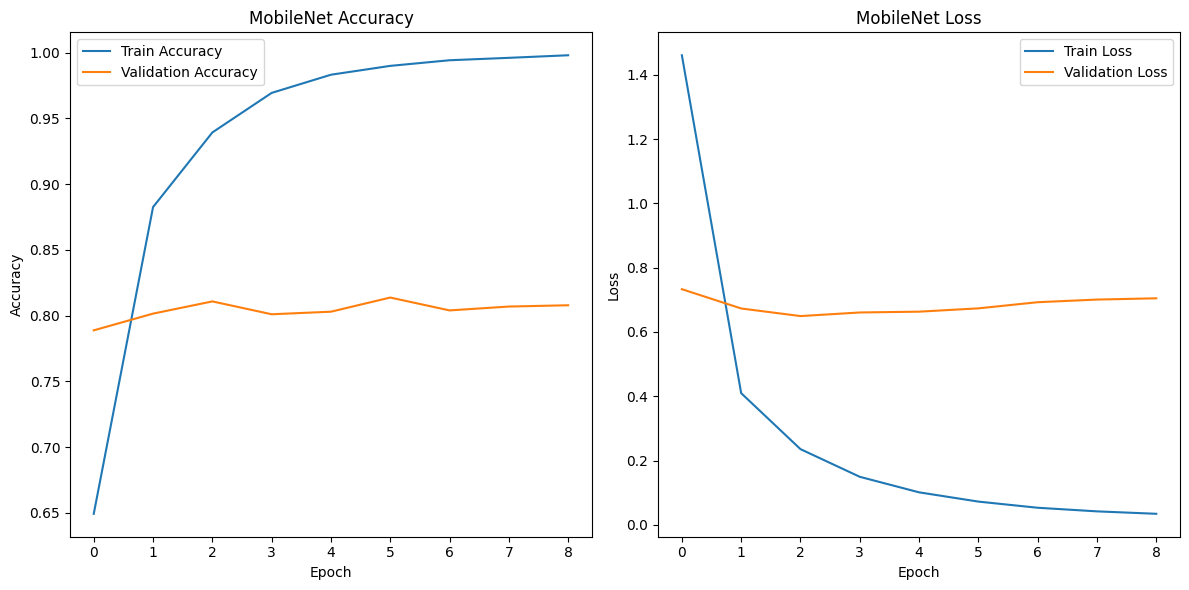

In [81]:
accuracy_validation_plot(history, 'MobileNet')

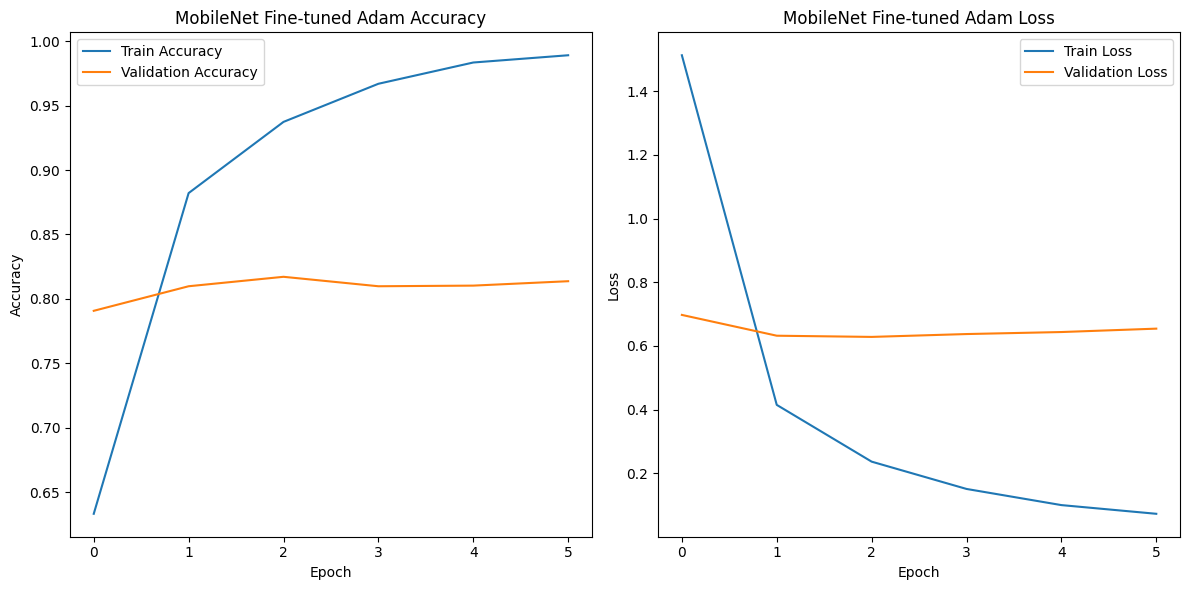

In [82]:
accuracy_validation_plot(history_finetuned_adam, 'MobileNet Fine-tuned Adam')

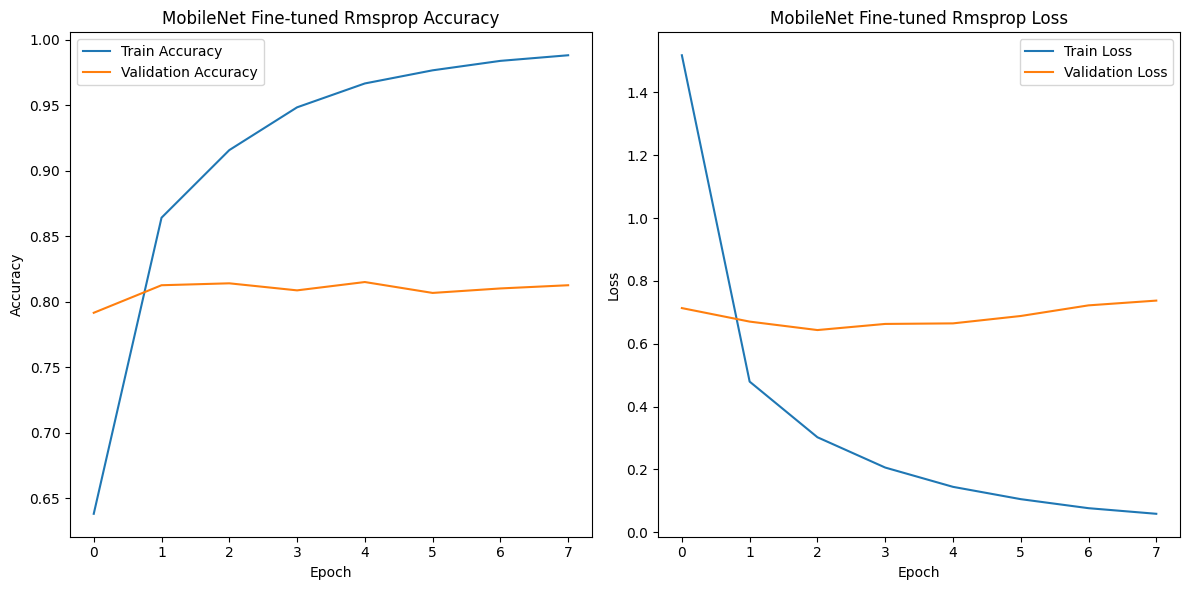

In [83]:
accuracy_validation_plot(history_finetuned_rmsp, 'MobileNet Fine-tuned Rmsprop')

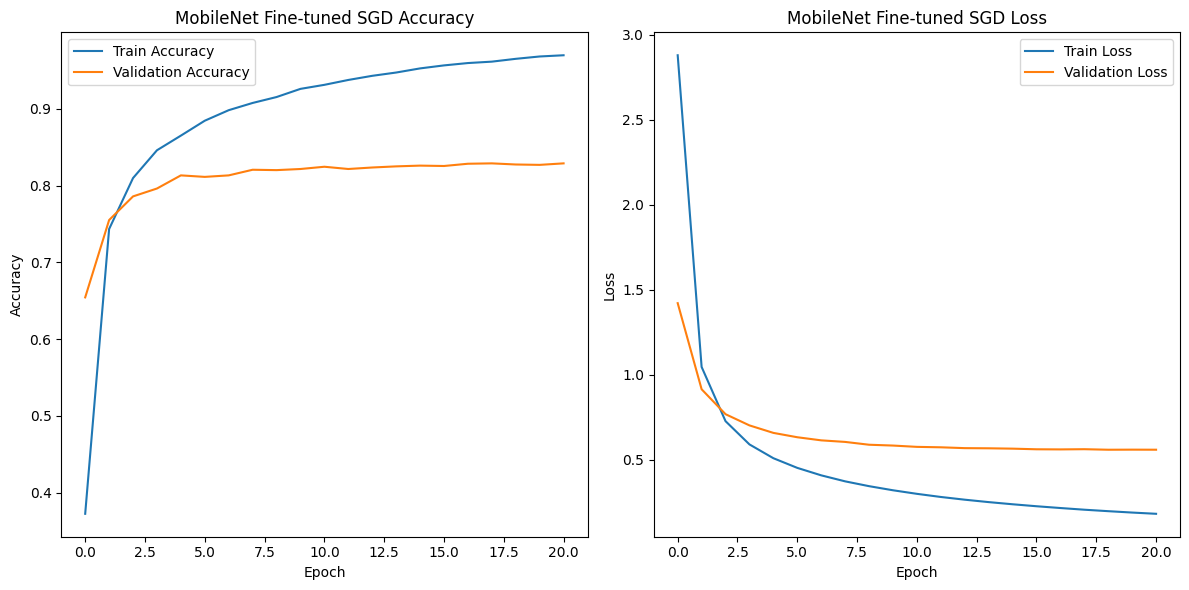

In [84]:
accuracy_validation_plot(history_finetuned_sgd, 'MobileNet Fine-tuned SGD')

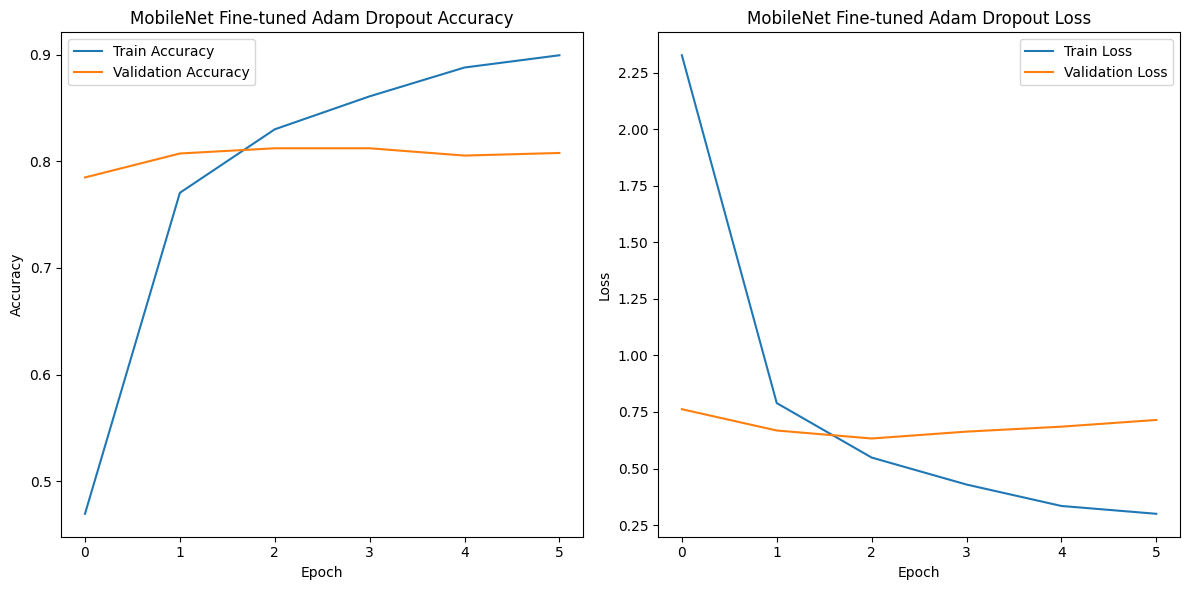

In [85]:
accuracy_validation_plot(history_finetuned_adam_dropout, 'MobileNet Fine-tuned Adam Dropout')

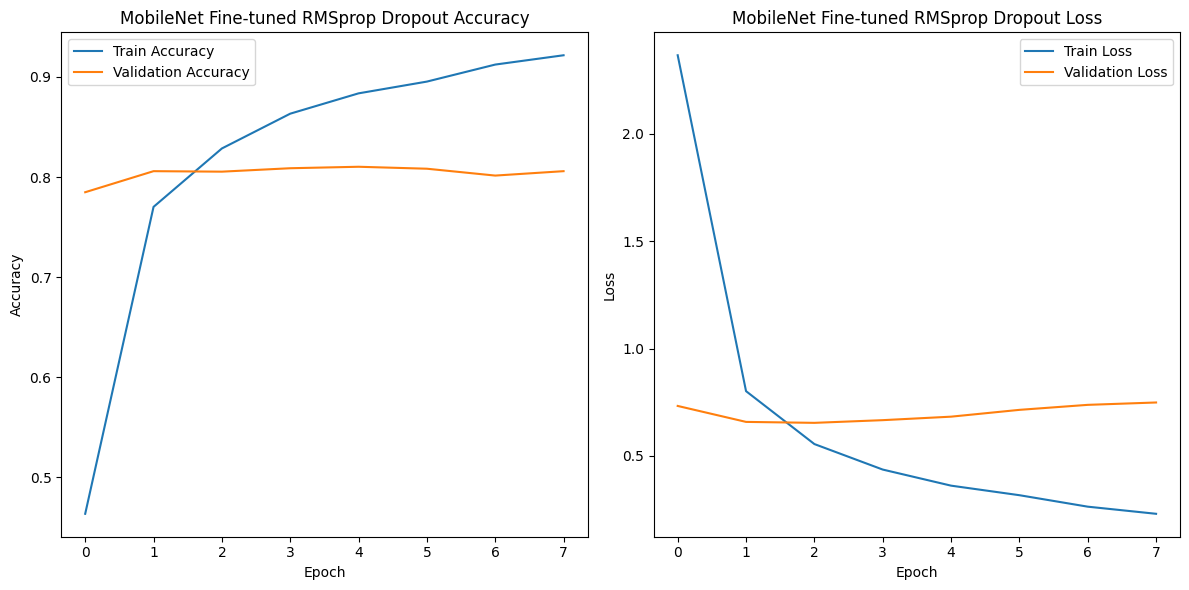

In [86]:
accuracy_validation_plot(history_finetuned_rmsp_dropout, 'MobileNet Fine-tuned RMSprop Dropout')

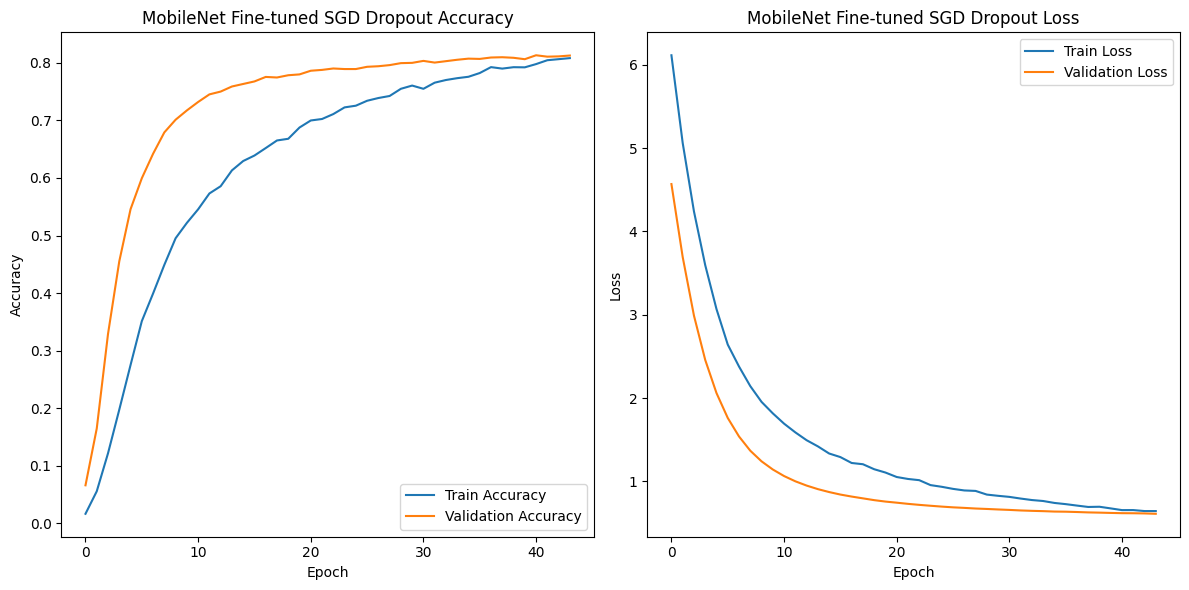

In [88]:
accuracy_validation_plot(history_finetuned_sgd_dropout, 'MobileNet Fine-tuned SGD Dropout')